In [1]:
# data manipulation 
import numpy as np
import pandas as pd

from datetime import datetime
import itertools

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


import prepare

In [2]:

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

Using your store items data you prepped in lesson 2 exercises:

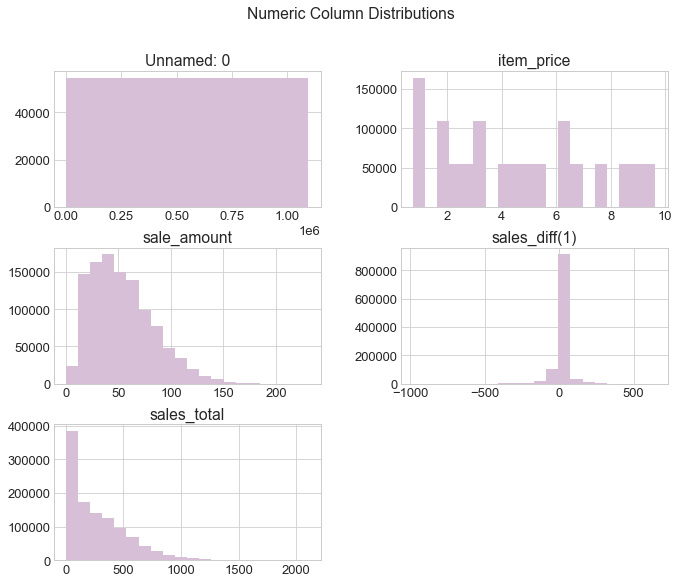

In [3]:
#bring in prepared data
store = prepare.prep_store_data()

In [4]:
store.shape

(1095600, 18)

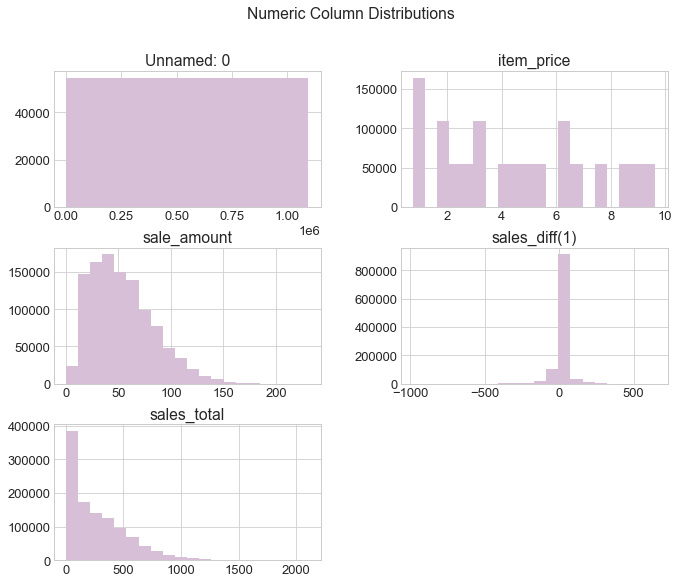

In [5]:
prepare.numeric_hists(store)

1. Split your data into train and test:
- you may either choose a date-based cutoff for your test set or 
- use a percentage based split

In [6]:
print("Date Range:", store.index.min(), "to", store.index.max())

Date Range: 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00


In [7]:
#date-based
train = store[:"2016"]
test = store["2017"]

In [8]:
train.shape

(876600, 18)

In [9]:
test.shape

(219000, 18)

In [10]:
#checking my split size
100 - (test.shape[0] / train.shape[0] * 100)

75.01711156741958

2. Validate your splits by plotting X_train and y_train.

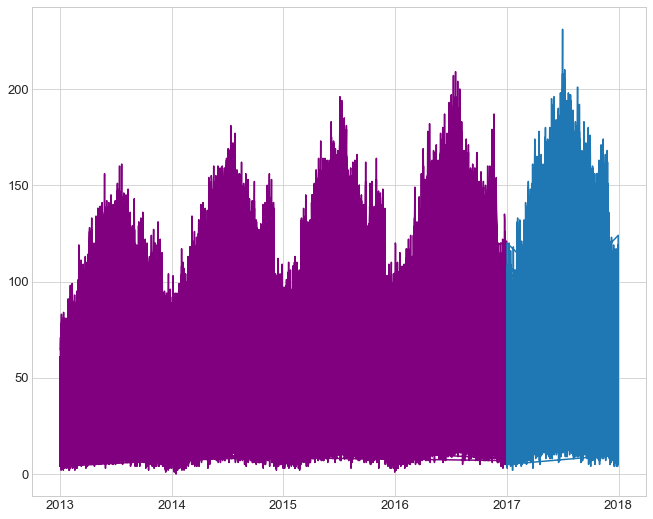

In [11]:
plt.plot(train.index, train.sale_amount, color="purple")
plt.plot(test.index, test.sale_amount)

In [12]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(+1)
weekly = weekly.rename(columns={"sales_total": "this_week"})

Takeaways:
 - Looking at the above we see there is a pattern and a slight growth every year

3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

In [13]:
y = train.sales_total

Text(0.5, 1.0, 'Sales Averages')

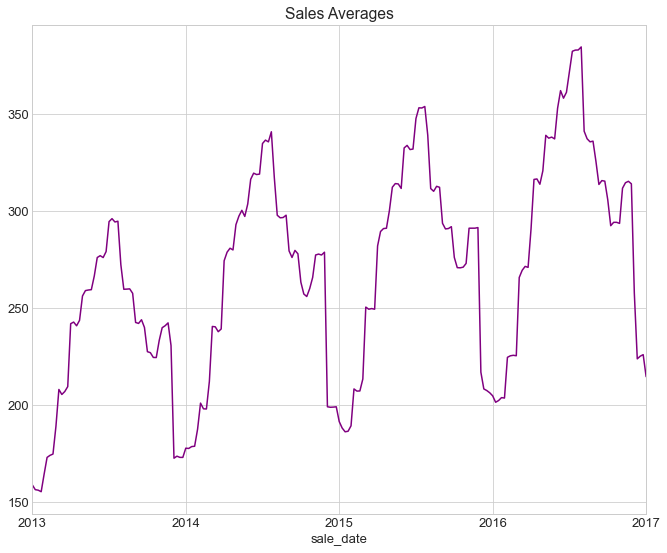

In [14]:
y.resample("1W").mean().plot(color='purple')
plt.title("Sales Averages")

Text(0.5, 1.0, 'Moving Sales Averages')

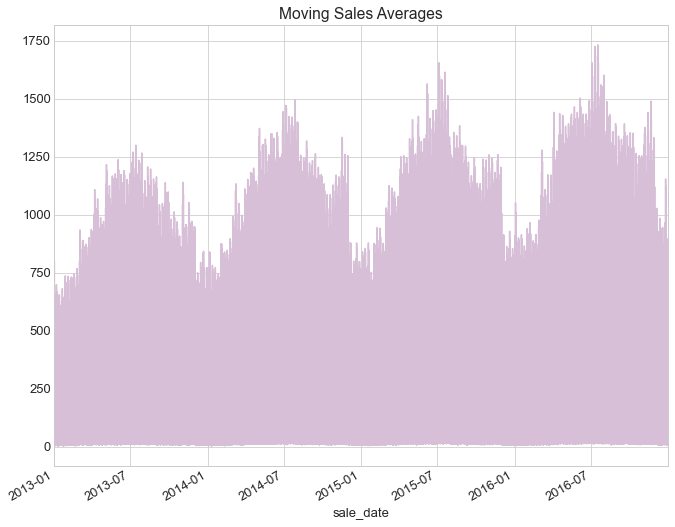

In [15]:
y.rolling(7).mean().plot(color="thistle")
plt.title("Moving Sales Averages")

4. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

In [16]:
y = train.sales_total

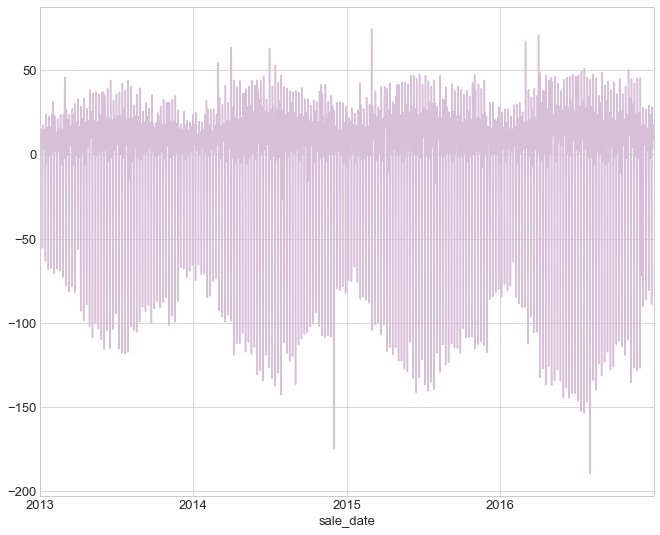

In [17]:
y.resample('D').mean().diff(1).plot(color="thistle")

5. Plot a time series decomposition.

In [18]:
decomp = sm.tsa.seasonal_decompose(train.resample("D").sales_total.mean())

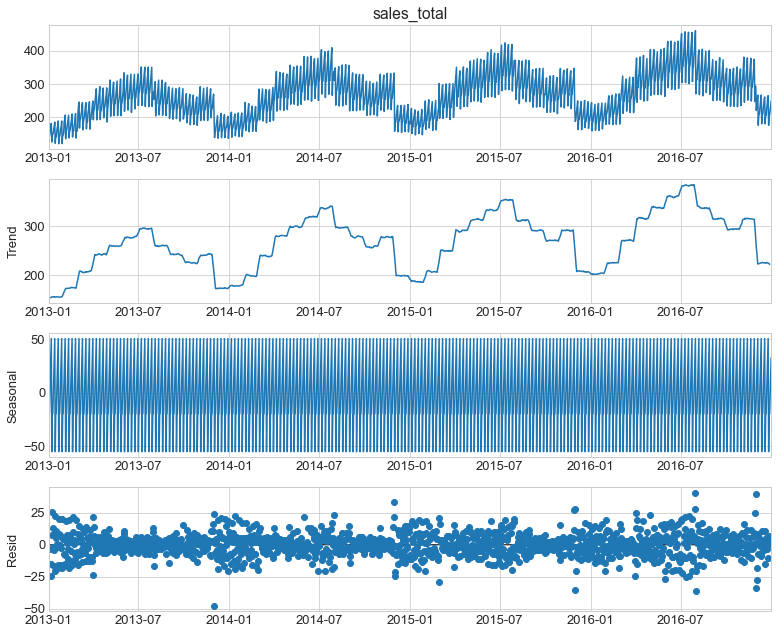

In [19]:
decomp.plot()
plt.show()

6. Create a lag plot (day over day).

In [20]:
y = train.sales_total

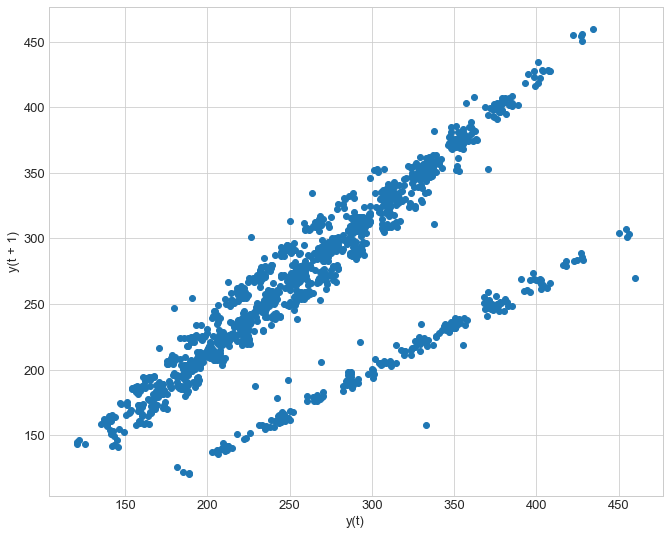

In [21]:
pd.plotting.lag_plot(train.sales_total.resample("d").mean(), lag=1)

7. Run a lag correlation.

In [22]:
y = pd.DataFrame(train.sales_total.resample("d").mean())
y = y.rename(columns={"sales_total": "today"})
y["nex_day"] = y.today.shift(1)
y.corr()

,today,nex_day
today,1.000000,0.747728
nex_day,0.747728,1.000000


Using your OPS data you prepped in lesson 2 exercises:

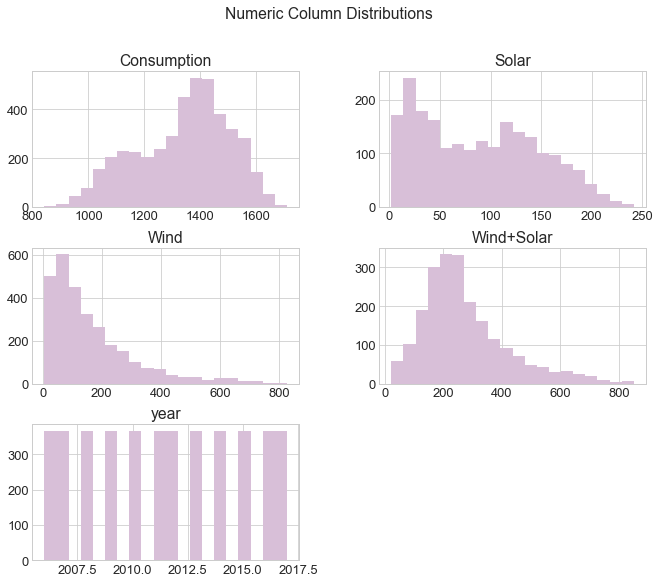

In [23]:
ops = prepare.prep_german_energy()

1. Split your data into train and test using the percent cutoff method.
2. Validate your splits by plotting X_train and y_train.

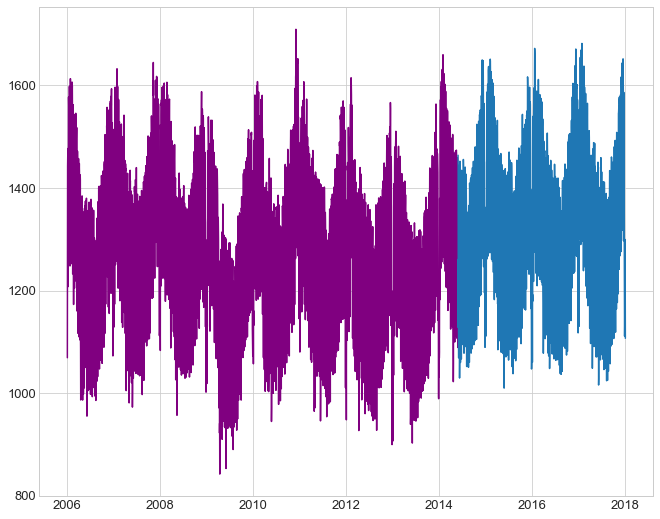

In [24]:
train_size = .70
n = ops.shape[0]
test_start_index = round(train_size * n)

train = ops[:test_start_index]
test = ops[test_start_index:]

plt.plot(train.index, train.Consumption, color="Purple")
plt.plot(test.index, test.Consumption)

3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

In [25]:
y = train.Consumption

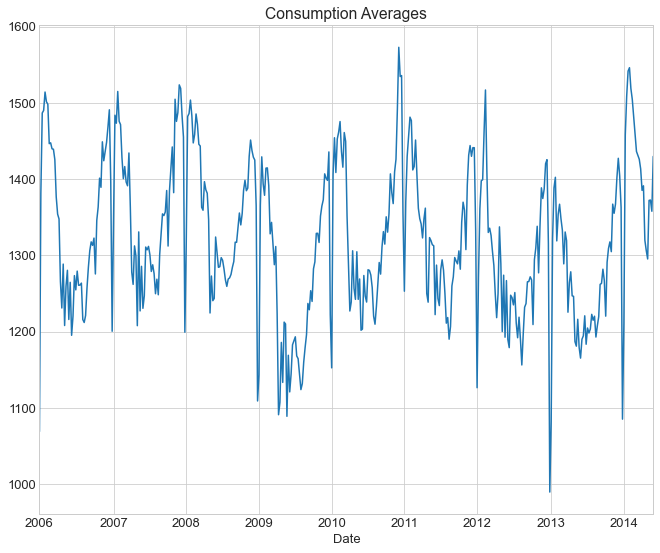

In [26]:
y.resample("1w").mean().plot()
plt.title("Consumption Averages")
plt.show()

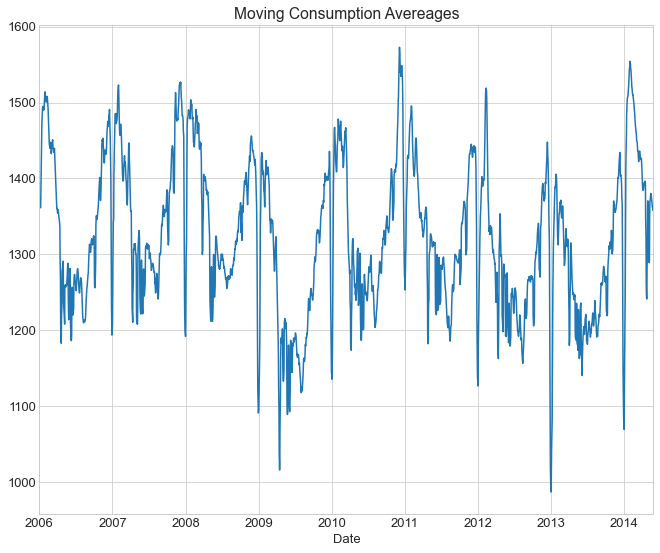

In [27]:
y.rolling(7).mean().plot()
plt.title("Moving Consumption Avereages")
plt.show()

4. Group the electricity consumption time series by month of year, to explore annual seasonality.

In [28]:
train.shape

(3068, 6)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3068 entries, 2006-01-01 to 2014-05-26
Data columns (total 6 columns):
Consumption    3068 non-null float64
Wind           1605 non-null float64
Solar          873 non-null float64
Wind+Solar     872 non-null float64
month          3068 non-null object
year           3068 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 167.8+ KB


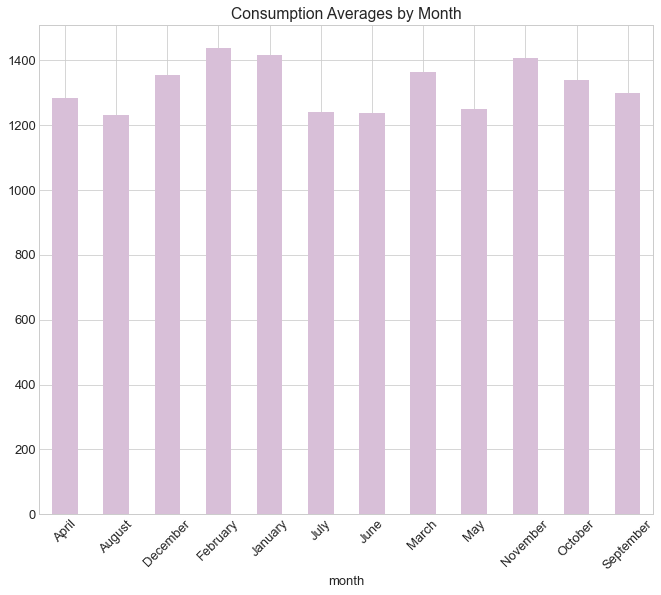

In [41]:
train.groupby("month").Consumption.mean().plot.bar(color="thistle")
plt.xticks(rotation=45)
plt.title("Consumption Averages by Month")
plt.show()

5. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

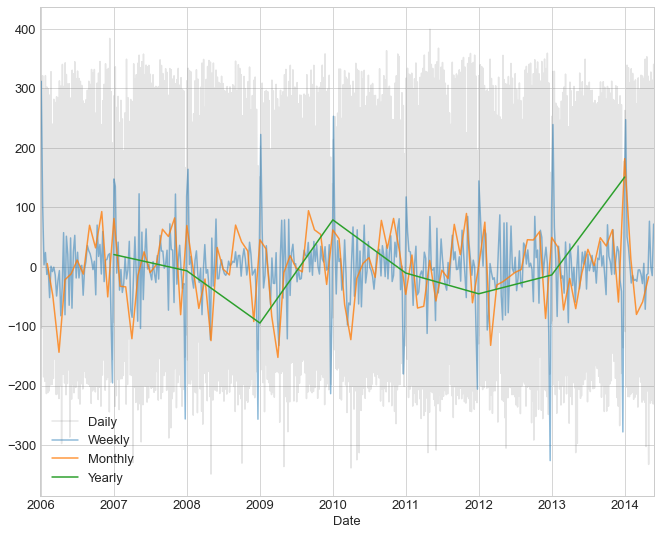

In [57]:
y.diff().plot(alpha=.2, label="Daily", color="grey")
y.resample('W').mean().diff().plot(alpha=.5, label="Weekly")
y.resample('M').mean().diff().plot(alpha=.8, label="Monthly")
y.resample('Y').mean().diff().plot(label="Yearly")
plt.legend()

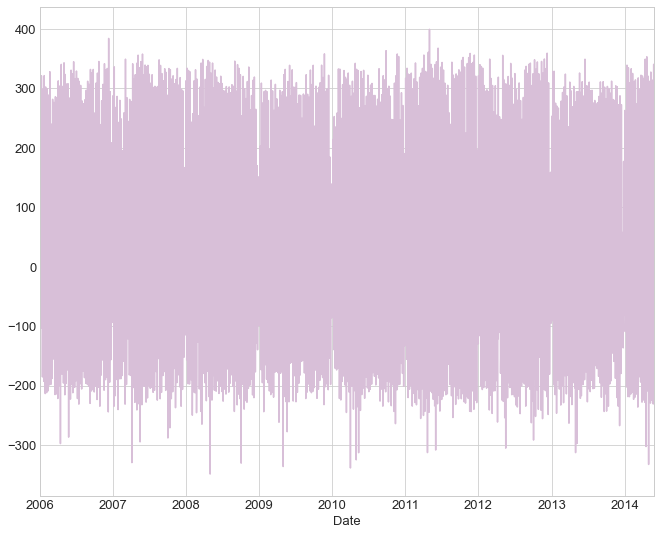

In [59]:
y.resample('D').mean().diff().plot(color="thistle")

6. Plot a time series decomposition.

In [60]:
y = train.Consumption.resample("D").mean()

In [61]:
result = sm.tsa.seasonal_decompose(y)

In [62]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})

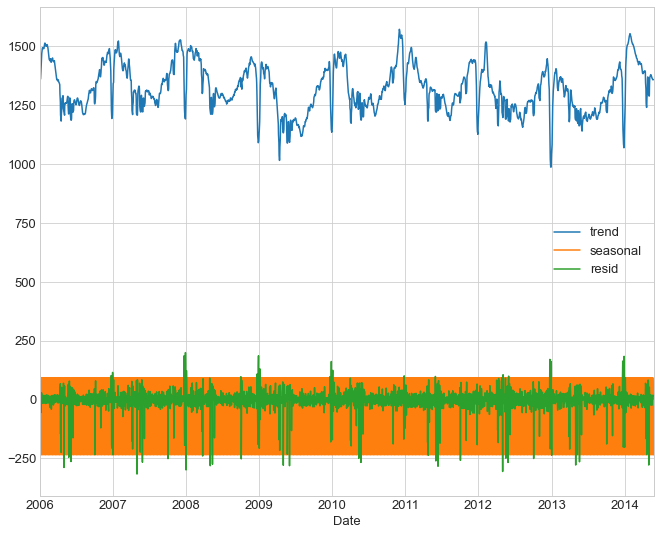

In [63]:
decomposition.iloc[:, 1:].plot()

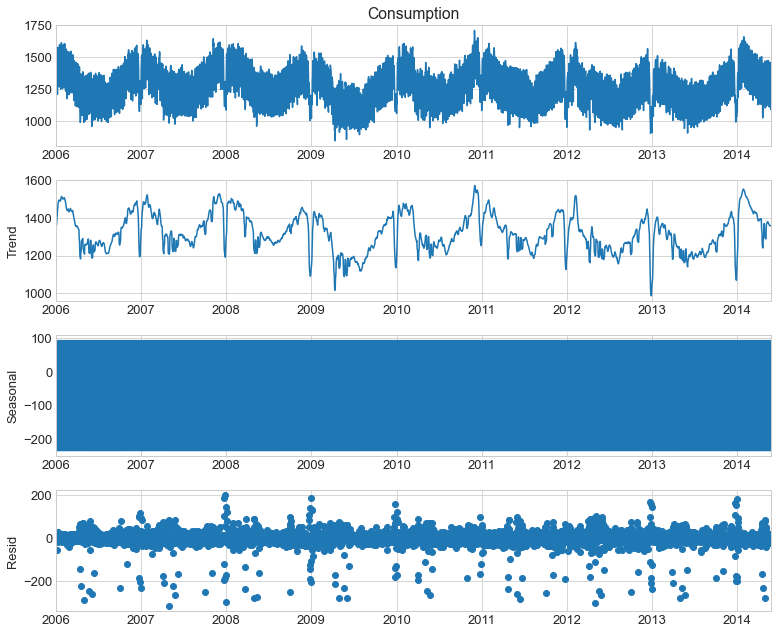

In [65]:
result.plot()
plt.show()